<a href="https://colab.research.google.com/github/Benjamindavid03/MachineLearning/blob/main/titanic_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis using Titanic dataset

### Dataset Link
 <a href="https://raw.githubusercontent.com/Benjamindavid03/MachineLearning/main/titanic-data.csv">Click here</a>
### Data description:
1. PassengerId - ID of the passenger
2. Survival - Survival (0 = No; 1 = Yes).
3. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
4. Name - Name
5. Sex - Sex
6. Age - Age
7. Sibsp - Number of Siblings/Spouses Aboard
8. Parch - Number of Parents/Children Aboard
9. Ticket - Ticket Number
10. Fare - Passenger Fare
11. Cabin - Cabin
12. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## Loading the Data 

In [517]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#reading a csv file using pandas
data = pd.read_csv("https://raw.githubusercontent.com/Benjamindavid03/MachineLearning/main/titanic-data.csv"); # source : https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv

In [518]:
# Preview top 5 rows using head()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [519]:
# Drop features that are unnecessary
df = data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [520]:
df.isnull().sum() # Check for null values to be imputed.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [521]:
print("Percentage of null-values in Age %.2f%%" %(df['Age'].isnull().sum()/df.shape[0]*100))

Percentage of null-values in Age 19.87%


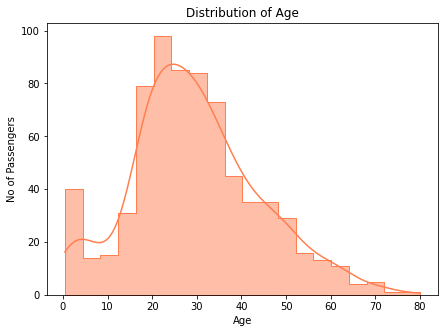

In [522]:
plt.figure(figsize=(7,5))
sns.histplot(data=df['Age'], bins=20, kde=True, color='coral', element='step')
plt.title("Distribution of Age")
plt.ylabel('No of Passengers')
plt.show()

We can clearly see that 'Age' is left-skewed

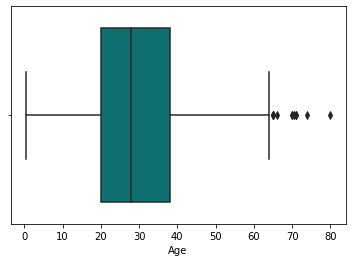

In [523]:
sns.boxplot(x=df['Age'], color='teal')

In [524]:
print("The mean Age of passengers:", df['Age'].mean())
print("The median Age of passengers:",df['Age'].median())

The mean Age of passengers: 29.69911764705882
The median Age of passengers: 28.0


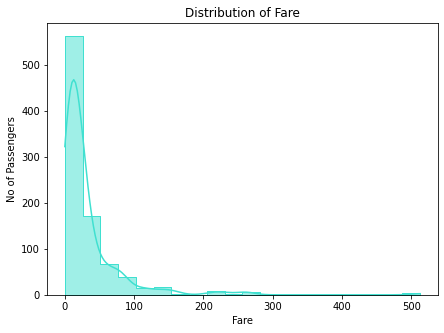

In [525]:
plt.figure(figsize=(7,5))
sns.histplot(data=df['Fare'], bins=20, kde=True, color='turquoise', element='step')
plt.title("Distribution of Fare")
plt.ylabel('No of Passengers')
plt.show()

we can see that Fare is left-skewed. This could be because of the there were more passengers in Class 3 than 1 and 2



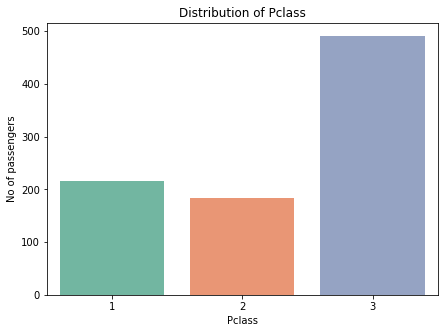

In [526]:
#Visualize the distribution of Pclass
plt.figure(figsize=(7,5))
sns.countplot(x='Pclass',data=df, palette='Set2')
plt.title('Distribution of Pclass')
plt.ylabel('No of passengers')
plt.show()

Here we can clearly see that more passengers travelled in PClass 3 and that's the reason why fare is skewed



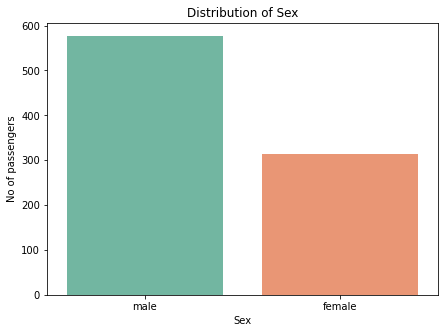

In [527]:
#Visualize the distribution of Sex
plt.figure(figsize=(7,5))
sns.countplot(x='Sex',data=df, palette='Set2')
plt.title('Distribution of Sex')
plt.ylabel('No of passengers')
plt.show()

Clearly there were more male passengers than females

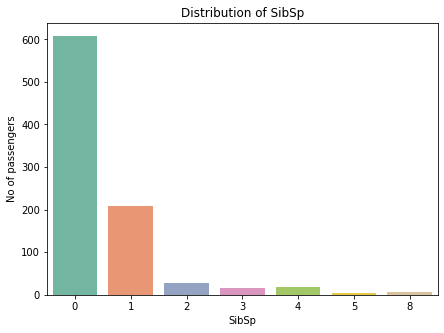

In [528]:
#Visualize the distribution of Sex
plt.figure(figsize=(7,5))
sns.countplot(x='SibSp',data=df, palette='Set2')
plt.title('Distribution of SibSp')
plt.ylabel('No of passengers')
plt.show()

'Age' contains missing values and it needs to be imputed (Mean / Median)

Since Age is left-skewed I'll impute with median Age for all missing values



In [529]:
df['Age'] = np.where(df['Age'].isnull(),df['Age'].median(),df['Age'])

In [530]:
df['Age'].isnull().sum()

0

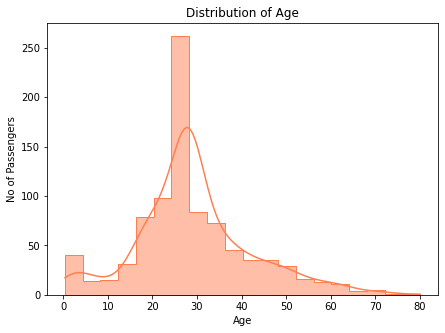

In [531]:
plt.figure(figsize=(7,5))
sns.histplot(data=df['Age'], bins=20, kde=True, color='coral', element='step')
plt.title("Distribution of Age")
plt.ylabel('No of Passengers')
plt.show()

In [532]:
#Lets first understand the basic information about this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [533]:
#gives the number of rows and columns
data.shape

(891, 12)

In [534]:
#gives the list of columns
data.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [535]:
#gives the basic statistical summaries of all numerical attributes in the dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Slicing and Data Selection

In [536]:
#print four rows from 1 to 15
data[1:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [537]:
# Extract data as series
survive_list = data['Survived']
survive_list

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [538]:
# Extract data as dataframe
survive_df = data[['Survived']]
survive_df

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [539]:
# Extract data as dataframe
survive_df = data[['Survived','Fare','Sex']]
survive_df

,Survived,Fare,Sex
0,0,7.2500,male
1,1,71.2833,female
2,1,7.9250,female
3,1,53.1000,female
4,0,8.0500,male
...,...,...,...
886,0,13.0000,male
887,1,30.0000,female
888,0,23.4500,female
889,1,30.0000,male


# Data Selection – Based on Conditional Filtering

In [540]:
#selecting the data based on certain conditions
dt = data[((data['Age'] >= 20) & (data['Fare'] >=500))] #get me the records of passengers who are above 20 years old and ticket more than 500$
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [541]:
#Now to see if they survived
dt['Survived']

258    1
679    1
737    1
Name: Survived, dtype: int64

In [542]:
data[((data['Age'] >= 20) & (data['Sex'] == 'female'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [543]:
#get the list of male passengers who are above 20 years old and had the fare lesser than 7$
df = data[((data['Age'] >= 20) & (data['Sex'] == 'male')) & (data['Fare'] < 7.0)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S


In [544]:
#get the list of all such passengers
df['Name']

129                  Ekstrom, Mr. Johan
179                 Leonard, Mr. Lionel
202          Johanson, Mr. Jakob Alfred
263               Harrison, Mr. William
271        Tornquist, Mr. William Henry
326           Nysveen, Mr. Johan Hansen
378                 Betros, Mr. Tannous
597                 Johnson, Mr. Alfred
804             Hedman, Mr. Oskar Arvid
806              Andrews, Mr. Thomas Jr
818    Holm, Mr. John Fredrik Alexander
822     Reuchlin, Jonkheer. John George
843          Lemberopolous, Mr. Peter L
872            Carlsson, Mr. Frans Olof
Name: Name, dtype: object

#Group by and sorting

In [545]:
#Sort the list of passengers by their fare (head to only show five records)
data.sort_values(['Fare'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [546]:
#find the mean age of both male and female
data.groupby('Sex')[['Age']].mean().head()

,Age
Sex,
female,27.915709
male,30.726645


In [547]:
#get a list of pasengers who are sorted by the gender
data[['Name','Sex','Fare']].sort_values('Sex').head()

,Name,Sex,Fare
383,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,52.0000
218,"Bazzani, Miss. Albina",female,76.2917
609,"Shutes, Miss. Elizabeth W",female,153.4625
216,"Honkanen, Miss. Eliina",female,7.9250
215,"Newell, Miss. Madeleine",female,113.2750


In [548]:
#Mean Fare price for the male and female taken in Titanic
data.groupby('Sex')[['Fare']].mean().sort_values(['Fare'], ascending=False).head()

,Fare
Sex,
female,44.479818
male,25.523893


In [549]:
#sorting the passengers based on the decreasing order of fare
data.sort_values(['Fare'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [550]:
# Now to get the survivors
df = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]
print("Male Survivors : ")
df.shape[0]

Male Survivors : 


109

In [551]:
# Now to get the survivors
df1 = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]
print("Female Survivors : ")
df1.shape[0]

Female Survivors : 


233

In [552]:
#get the list of male surivors
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [553]:
#get the list of female survivors
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


# Dropping a column

In [554]:
# Use drop function to drop columns (the ‘Parch’ column is dropped. Here axis= 1 specifies that column is to be dropped)
df.drop('Parch', axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,19947,35.5000,C52,S


In [555]:
data.shape

(891, 12)

In [556]:
# Drops all rows containing missing data
data.dropna()
data.shape

(891, 12)

In [557]:
# Drop all columns containing missing data
data.dropna(axis=1)
data.shape

(891, 12)

In [558]:
age_mean = data['Age'].mean()
print("The mean age of the passengers is: ", age_mean)

The mean age of the passengers is:  29.69911764705882


In [559]:
# We can fill the null values with this mean age
data['Age'].fillna(age_mean, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# Finding out the children and the adult

In [560]:
# Classify children from adult based on age
def classify_passengers(age):
    if age >= 12:
        return 'Adult'
    else:
        return 'Child'

In [561]:
# create a new feature out of the 'Age' feature by applying the classify_passengers function
data['category'] = data['Age'].apply(classify_passengers)

In [562]:
# check how many adult have survived
adult = data[(data['category'] == 'Adult') & (data['Survived'] == 1)]
adult.shape[0]

303

In [563]:
# check how many children have survived
child = data[(data['category'] == 'Child') & (data['Survived'] == 1)]
child.shape[0]

39

In [564]:
# check how many children have died
child = data[(data['category'] == 'Child') & (data['Survived'] == 0)]
child.shape[0]

29

# Plotting

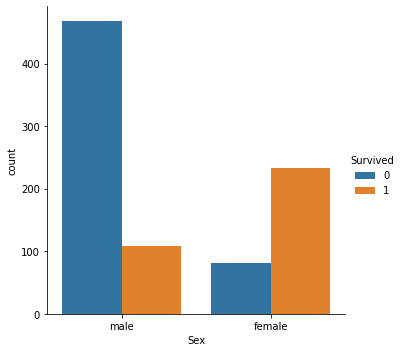

In [565]:
# Countplot using seaborn library
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = data)

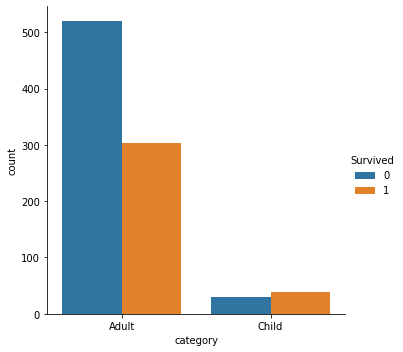

In [566]:
# Countplot using seaborn library
sns.catplot(x ="category", hue ="Survived",
kind ="count", data = data, legend=True)

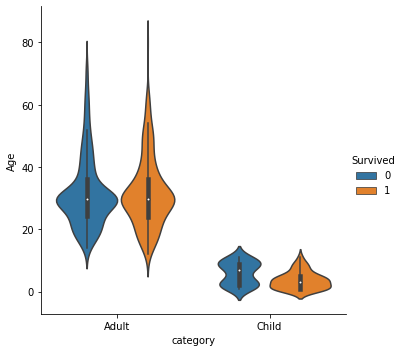

In [567]:
# Countplot using seaborn library
sns.catplot(x ="category", y='Age', hue ="Survived",
kind ="violin", data = data, legend=True) #kind = bar | point | count | swarm | strip | violin

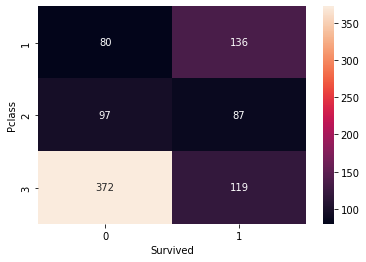

In [568]:
# Group the dataset by Passenger class and Survived and then unstack them
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

## Model Building

In [569]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV

In [570]:
# Drop features that are unnecessary
df = data.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked','category'], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [571]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [572]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [573]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [574]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [575]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
print("Feature names are:", feature_name)
print("Survived categories:",class_name)

Feature names are: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Survived categories: [0, 1]


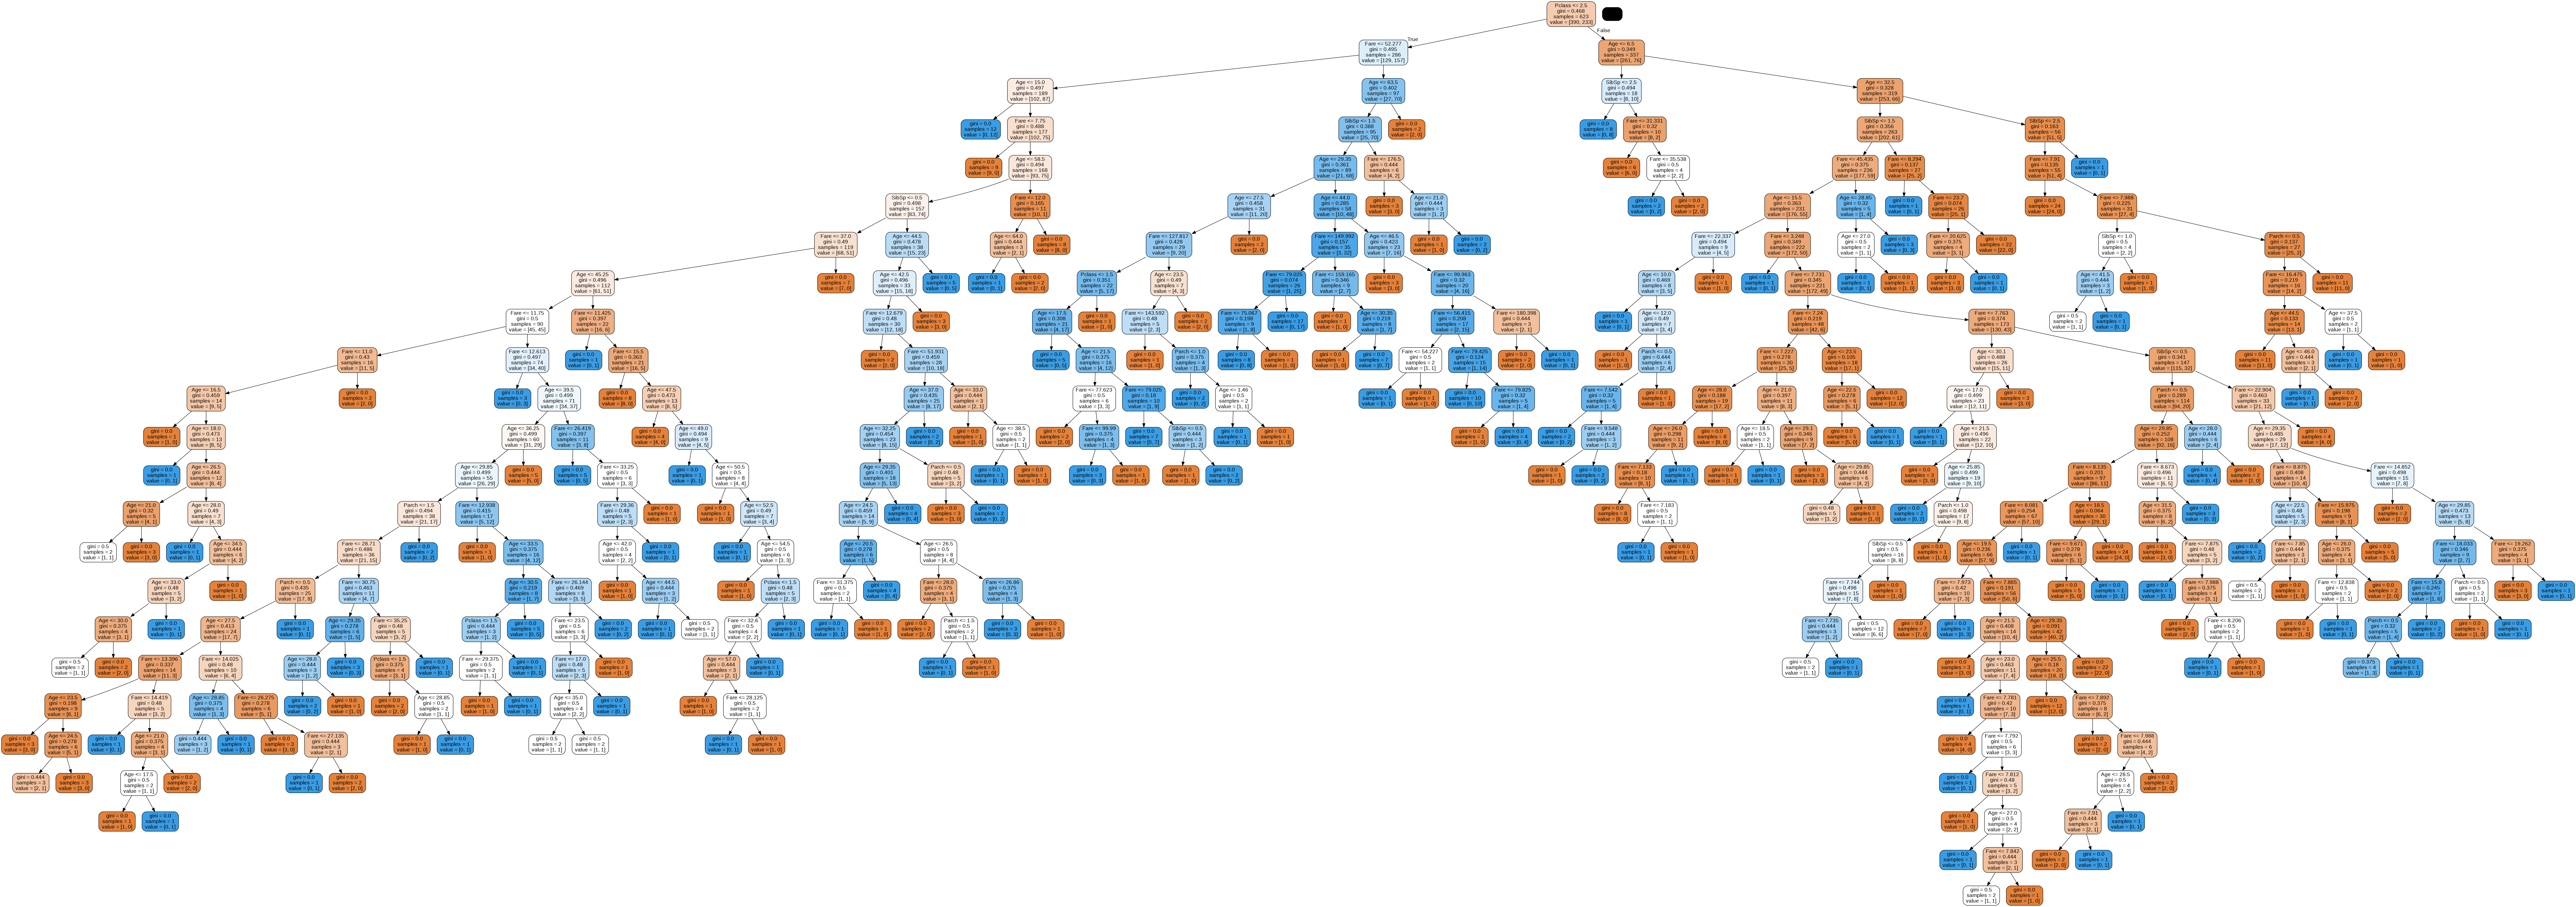

In [576]:
import pydotplus
from IPython.display import Image
# Create a dot file while stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name, rounded=True, filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("TitanicDTree.png")

# Display graph
Image(graph.create_png())


In [577]:
clf.score(x_train,y_train)


0.9678972712680578

In [578]:
clf.score(x_test,y_test)


0.664179104477612

# References
1. https://seaborn.pydata.org/generated/seaborn.catplot.html
2. https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
3. https://seaborn.pydata.org/tutorial.html
4. https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-data-analysis-using-pandas-hands-on-data-analysis-on-imdb-movies-data/#:~:text=Pandas%20provide%20extended%20data%20structures,%2C%20joining%2C%20and%20concatenating%20data.
5. http://rstudio-pubs-static.s3.amazonaws.com/24969_894d890964fd4308ab537bfde1f784d2.html
